# Population Data: Taking a Look at all the Variables and the Counties In the Convex Hull

**What is a Convex Hull?**

A convex hull is the smallest convex polygon that completely encloses a set of points in a two-dimensional space or a convex polyhedron in a three-dimensional space. The convex hull is formed by stretching a rubber band around a set of points and then releasing it to snap tightly around them.

The concept of convex hulls has applications in various fields such as computer science, computational geometry, operations research, and data analysis. It is often used in algorithms to solve problems such as finding the shortest path between two points, identifying the optimal location of a facility, and identifying outliers in a dataset.

**What do the Interior Points from a Convex Hull Tell us?**

The interior points of a convex hull tell us about the relationship between the points and the hull itself.
Specifically, interior points indicate that the points within the convex hull are tightly clustered and do not have significant gaps or variations in their arrangement. The tightly clustered points suggest that the points are similar in some way, such as having similar characteristics or being part of a similar category or group.

In contrast, if there are many points outside the convex hull, this indicates that the points are more widely dispersed and may have more significant differences or variations among them.



In [1]:
import numpy as np #linear algebra
import pandas as pd #data manipulation and analysis
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.path as mpath
import plotly.express as px
import plotly.graph_objects as go
import textwrap
from urllib.request import urlopen
import json


In [57]:
# Read-in dataframe with cluster ids from KMeans Clustering Analysis
cluster2_df = pd.read_csv("popClusterData.csv", index_col=0)
cluster2_df.head()

,Population EstimatesJuly 1 2021(),Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Two or More Races,Hispanic or Latino,White alonenot Hispanic or Latino,Veterans2017-2021,Foreign born persons2017-2021,cluster_id,Banned or not,County Name
0,27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,0.00,440.67,302.96,26385.24,1840,192.79,0,0.0,"Adams County, Ohio"
1,101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,0.00,3456.78,3761.79,81132.66,6098,1830.06,0,1.0,"Allen County, Ohio"
2,52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,52.32,784.74,837.06,49752.52,3076,784.74,0,0.0,"Ashland County, Ohio"
3,97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,97.34,2433.43,4672.18,86240.58,7158,1557.39,0,0.0,"Ashtabula County, Ohio"
4,62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,62.06,1613.46,1241.12,55726.29,3255,2544.30,0,0.0,"Athens County, Ohio"


# All counties in each cluster

The `funcationsAll.py` file contains python code that imports various libraries for data analysis, visualization, and machine learning. 

It defines a function called `split_dataframe_by_cluster` that takes a pandas DataFrame and the 'cluster_id' column as inputs and splits the DataFrame into multiple DataFrames based on the unique values in the 'cluster_id' column.

Another function called `get_cluster_coords_dict` is defined, which takes two inputs, a cluster DataFrame and the original DataFrame, and returns a dictionary of the coordinates points for all the counties in each cluster. These functions are used to create a list of coordinate dictionaries for each cluster in the data.

The code then defines three functions, `cluster0`, `cluster1`, and `cluster2`, that each takes a dictionary of cluster coordinates as an input and returns the coordinates for a specific cluster.

Finally, the code defines a function called `clusterk_dict` that takes a list of cluster DataFrames and a list of coordinate dictionaries as inputs and returns a dictionary where each key is a cluster number. The corresponding coordinate points represent the counties. 

In [58]:
from functionsAll import split_dataframe_by_cluster, get_cluster_coords_dict,coords, clusterk_dict,\
cluster0, cluster1, cluster2

In [59]:
# 1
df_list = split_dataframe_by_cluster(cluster2_df, 'cluster_id')

# 2
coords_list = coords(df_list, cluster2_df)

# 3
clusterK_dict = clusterk_dict(df_list, coords_list)

In [60]:
for i in range(len(df_list)):
    if len(df_list) ==1:
        cluster0_dict = cluster0(clusterK_dict)
    elif len(df_list) ==2:
        cluster0_dict = cluster0(clusterK_dict)
        cluster1_dict = cluster1(clusterK_dict)
    elif len(df_list) ==3:
        cluster0_dict = cluster0(clusterK_dict)
        cluster1_dict = cluster1(clusterK_dict)
        cluster2_dict = cluster2(clusterK_dict)
        
    print(f"cluster{i}_dict have been made to dictionary")
        
        



cluster0_dict have been made to dictionary
cluster1_dict have been made to dictionary
cluster2_dict have been made to dictionary


# Banned counties in each cluster

The `funcationsBanned.py` file contains python code that imports several libraries/modules for data analysis and visualization, machine learning, and geometry operations. The code defines several functions that take a DataFrame as input and perform operations to extract information about clusters of banned counties based on their coordinates. 

The `filter_banned_counties` function filters out clusters of banned counties from a DataFrame based on their cluster ID and the value of a "Banned or not" column. It returns a list of DataFrames containing banned counties if there are more than two banned counties in a cluster or None if there are no banned counties.

The `get_banned_cluster_coords_dict` function creates a dictionary of coordinate pairs for each pair of columns in the banned counties DataFrame.

The `bannedCoords` function takes a list of banned county DataFrames and the original DataFrame and creates a list of dictionaries containing coordinate pairs for each pair of columns in the banned county DataFrame.

The `clusterk_dict_banned` function takes a list of banned county DataFrames and a list of dictionaries containing coordinate pairs. It creates a dictionary with keys representing each banned county cluster and values containing the respective coordinate pairs.

Finally, the `cluster0Banned`, `cluster1Banned`, and `cluster2Banned` functions return the coordinate pairs for the banned counties in clusters 0, 1, and 2, respectively, based on the input dictionary.

In [61]:
from functionsBanned import filter_banned_counties, get_banned_cluster_coords_dict, bannedCoords, clusterk_dict_banned,\
cluster0Banned, cluster1Banned, cluster2Banned

In [62]:

# 1
banned_counties_df = filter_banned_counties(cluster2_df)

# 2
bannedCoords_list = bannedCoords(banned_counties_df, cluster2_df)

# 3
clusterKBanned_dict = clusterk_dict_banned(banned_counties_df, bannedCoords_list)


Cluster0 had enough banned counties to find non-banned counties in the banned counties convex hull.


# Now to look at the counties inside the convex hull of the banned counties 

The `countyName.py` file contains Python code is a Python script that imports various libraries/modules such as NumPy, Pandas, Matplotlib, Seaborn, and Scikit-learn to perform data analysis, data visualization, and machine learning tasks.
The code contains several functions that take a Pandas DataFrame (df) and other input parameters as arguments and perform specific tasks.

The `banned_counties_list` function returns a list of county names that have been banned based on a column in the DataFrame called "Banned or not."

The `countyNames_cluster0`, `countyNames_cluster1`, and `countyNames_cluster2` functions takes four inputs, the original data frame, a dictionary `(clusterk_dict)` that contains the x and y coordinates of the counties in each cluster and a dictionary `(clusterk_banned_dict)` that contains the x and y coordinates of the banned counties in each cluster. You may see that not all clusters will contain a banned county, and finaly a list of all the banned counties `bannedCountiesList)`.

These three fucntions returns a dictionary where keys are tuples (pair of coordinates), and values are lists of county names that belong to a specific cluster. The function uses ConvexHull and mpath.Path methods find a specific cluster's boundary and return the county names inside that boundary. If there is a cluster with multiple banned counties, then the merge_dicts function merges two dictionaries (dict1 and dict2) and returns the merged dictionary.

In [63]:
from countyName import banned_counties_list, countyNames_cluster0, countyNames_cluster1, countyNames_cluster2, merge_dicts

In [64]:
bannedCountiesList=banned_counties_list(cluster2_df)



for i in range(len(banned_counties_df)):
    if len(banned_counties_df) ==1:
        cluster0_banned_dict = cluster0Banned(clusterKBanned_dict)
        print(f"Only one cluster had non-banned counties in the convex hull: Cluster{i}")
        allCounties=countyNames_cluster0(cluster2_df, cluster0_dict, cluster0_banned_dict, bannedCountiesList)

    elif len(banned_counties_df) ==2:
        cluster0_banned_dict = cluster0Banned(clusterKBanned_dict)
        cluster1_banned_dict = cluster1Banned(clusterKBanned_dict)

        countyName0=countyNames_cluster0(cluster2_df, cluster0_dict, cluster0_banned_dict, bannedCountiesList)
        countyName1=countyNames_cluster1(cluster2_df, cluster1_dict, cluster1_banned_dict, bannedCountiesList)

        print("Two clusters had non-banned counties in the convex hull.")



    elif len(banned_counties_df) ==3:
        cluster0_banned_dict = cluster0Banned(clusterKBanned_dict)
        cluster1_banned_dict = cluster1Banned(clusterKBanned_dict)
        cluster2_banned_dict = cluster2Banned(clusterKBanned_dict)

        countyName0=countyNames_cluster0(cluster2_df, cluster0_dict, cluster0_banned_dict, bannedCountiesList)
        countyName1=countyNames_cluster1(cluster2_df, cluster1_dict, cluster1_banned_dict, bannedCountiesList)
        countyName2=countyNames_cluster0(cluster2_df, cluster2_dict, cluster2_banned_dict, bannedCountiesList)





Only one cluster had non-banned counties in the convex hull: Cluster0


Now that we have all the column pairs with non-banned counties within thier respected banned counties convex hull. We can now look at which variable pairs contain the most counties in the banned counties' convex hull.

# Getting the top variable pairs, and there respected counties

The `topVariableFunctions.py` file contains several functions related to data analysis, visualization, and preprocessing for machine learning. Here is a brief explanation for each function:

`filtered_var_pairs` This function takes a dictionary called "allCounties" as input. It returns a list of key-value pairs where each key is a tuple containing two strings (category and subcategory), and each value is a list of counties. This function filters the original dictionary and extracts the relevant information for further analysis.

`categoryCountyList` takes the filtered list of key-value pairs as input and returns a dictionary where each key is a category string, and each value is a list of counties. The function also prints out the category with the most counties.

`subcategoryCountyList` takes the filtered list of key-value pairs as input and returns a dictionary where each key is a subcategory string, and each value is a list of counties. The function also prints out the subcategory with the most counties.

`common keys` This function takes two dictionaries as input and returns a new dictionary that contains the intersection of their keys and the union of their values.

`freq_var` This function takes a ranked list as input and returns a list of tuples where each tuple contains a county name and a list of variable names associated with that county. The ranked list is assumed to have a specific structure (with indices for county name, variable rank, variable name, and list of counties associated with the variable), which needs to be explained in the code snippet provided.

In [65]:
from topVariableFunctions import filtered_var_pairs, categoryCountyList, subcategoryCountyList, commonKeys, freq_var

filt = filtered_var_pairs(allCounties)

categorycountyList = categoryCountyList(filt)

subcategorycountyList = subcategoryCountyList(filt)


combinedVars = commonKeys(categorycountyList, subcategorycountyList)

The category with the most counties is 'Black or African American alone' with 28 counties.
The subcategory with the most counties is 'Two or More Races' with 28 counties.


After all variables are combined, we can now take a look at some of the counties that may be at risk the most common variable amoung them

# Vizulaization using Common Counties and Frequent Variables

## Table of Demographic varibales and a list counties

In [66]:
sorted_var_dict = dict(sorted(combinedVars.items(), key=lambda x: len(x[1]), reverse=True))

In [67]:
# Make ranking table of vars.
ranked_listTbl = [(i+1, item[0], len(item[1]), ", ".join([textwrap.fill(', '.join(textwrap.wrap(c, width=10)), width=80) for c in item[1]])) for i, item in enumerate(sorted_var_dict.items())]
topVarTbl = pd.DataFrame(ranked_listTbl)
topVarTbl.columns=['Rank', 'Demographic_variable', 'Number_of_counties', 'List_of_Counties']

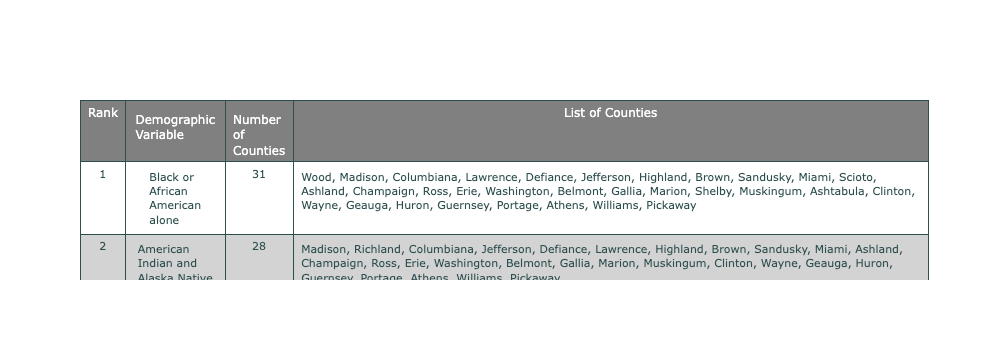

In [68]:
# try to chnage lengh of cloumn
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'


fig = go.Figure(data=[go.Table(
    columnwidth = [50,110,75,700],

    header=dict(
        values=['Rank', 'Demographic Variable', 'Number of Counties', 'List of Counties'],
                    line_color='darkslategray',
                    fill_color=headerColor,
                    align=['left','center'],
                    font=dict(color='white', size=12)
    ),
    cells=dict(
        values=[topVarTbl.Rank, topVarTbl.Demographic_variable, topVarTbl.Number_of_counties, topVarTbl.List_of_Counties],
               line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['center', 'center', 'center', 'left'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()

The table above gives a ranking for each demographic variable in their respective subset of data, the number of counties, and a list of the counties.

## Plotting counties frequcy in each variable
Checking to see the values of each county that apeared in the table above.

In [69]:
# # Make ranking table of vars.
ranked_list = [(i+1, item[0], len(item[1]), item[1]) for i, item in enumerate(sorted_var_dict.items())]
newdf2 = pd.DataFrame(ranked_list)
newdf2.columns=['Rank', 'Demographic_variable', 'Number_of_counties', 'List_of_Counties']

### Transforming newdf2 to become tidy:

In [70]:
# Separate the list of counties into individual rows
newdf2 = newdf2.explode('List_of_Counties')

# Drop the duplicate columns
newdf2 = newdf2.drop_duplicates(subset=['Rank', 'List_of_Counties'])

# Rename the columns for clarity
newdf3 = newdf2.rename(columns={
    'Demographic_variable': 'Demographic_Variable',
    'Number_of_counties': 'Number_of_Counties',
    'List_of_Counties': 'County'
})

# Display the updated data frame
# newdf3.head()

In [71]:
# Melting OG data:
melted_df = pd.melt(cluster2_df, id_vars=['County Name'], var_name='Attribute', value_name='Value')
melted_df['County Name'] = melted_df['County Name'].apply(lambda x: x[:-13])
# melted_df

In [72]:
tidy_df = pd.merge(newdf3, melted_df[['County Name', 'Attribute', 'Value']], left_on=['County','Demographic_Variable'],
                   right_on=['County Name', 'Attribute'])
tidy_df.drop(['Attribute','County Name'], axis=1, inplace=True)
# tidy_df.head()

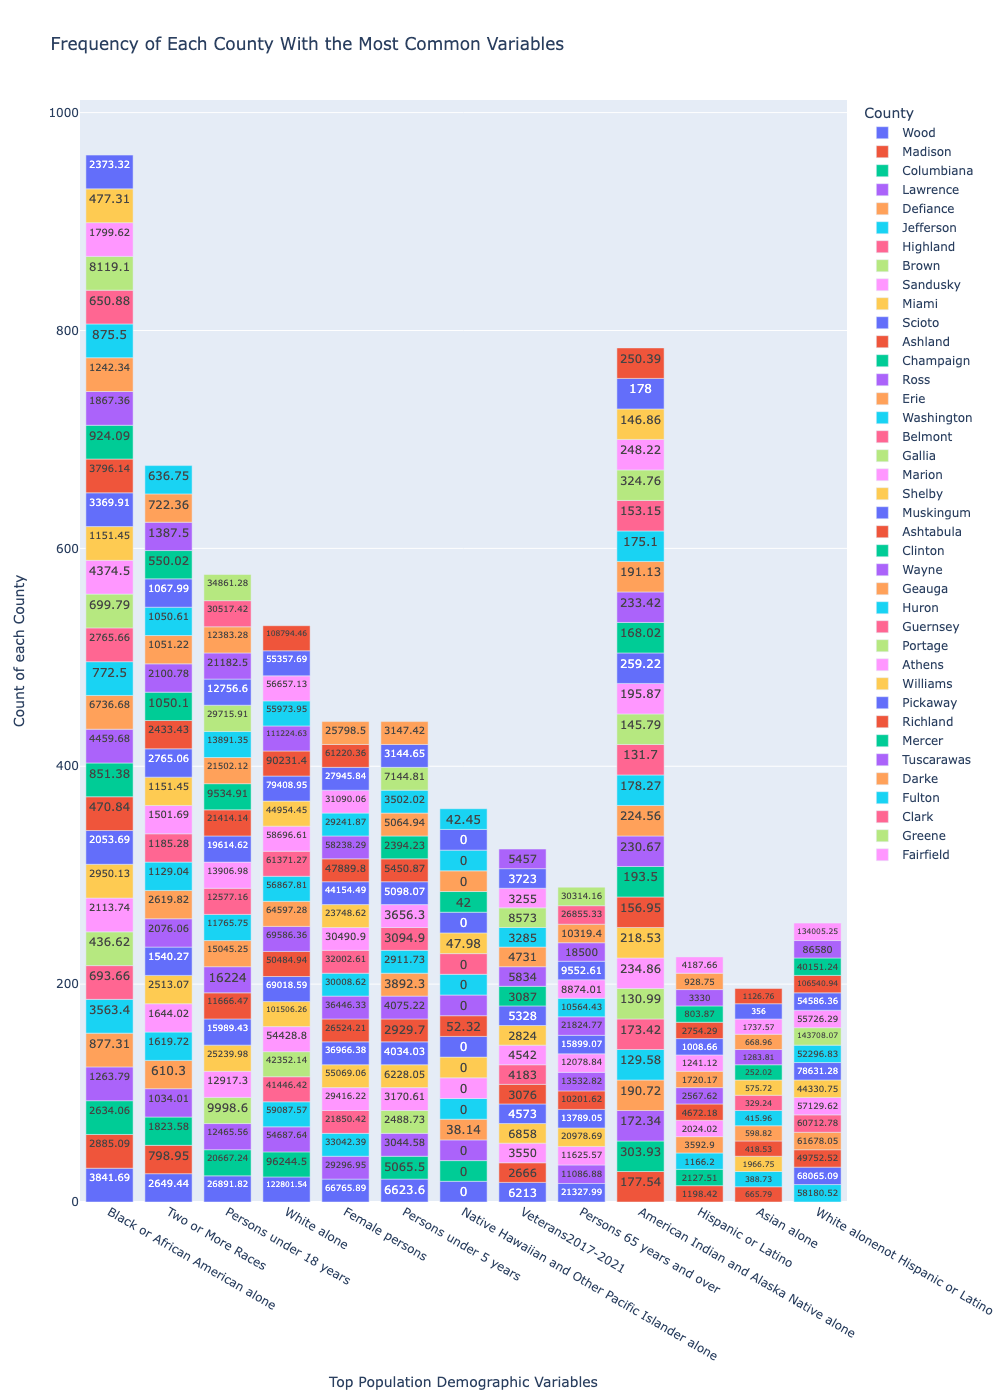

In [75]:
# create bar chart trace
fig = px.bar(tidy_df, x=tidy_df.Demographic_Variable, y=tidy_df.Number_of_Counties, text='Value', color='County',
             labels={"Attribute": "Attribute",
                     "Value": "Attribute Value",
                     "Number_of_Counties":'Count of each County',
                     'Demographic_Variable': 'Top Population Demographic Variables'
                 },
             title="Frequency of Each County With the Most Common Variables",)

fig.update_traces(textposition='inside')
#  update the layout to adjust the size of the plot
fig.update_layout(
    width=1200,  # set the width of the plot to 800 pixels
    height=1400,  # set the height of the plot to 600 pixels
)

# display the plot
fig.show()


## Table of Counties and a list of Population Demographic Variables

In [76]:
freq_var =freq_var(ranked_list)

In [77]:
# var_freq to dictionary
var_freq_dict = {item[0]: item[1] for i, item in enumerate(freq_var)}

In [78]:
# sorting var_freq_dict dictionary
sorted_var_freq_dict = dict(sorted(var_freq_dict.items(), key=lambda x: len(x[1]), reverse=True))

In [79]:
# Make ranking table of vars.
ranked_var_freqViz = [(i+1, item[0], len(item[1]), ", ".join([textwrap.fill(' '.join(textwrap.wrap(c, width=10)), width=80) for c in item[1]])) for i, item in enumerate(sorted_var_freq_dict.items())]
top_var_freqdfViz = pd.DataFrame(ranked_var_freqViz)
top_var_freqdfViz.columns=['Rank', 'County', 'Number_of_variables', 'List_of_variables']

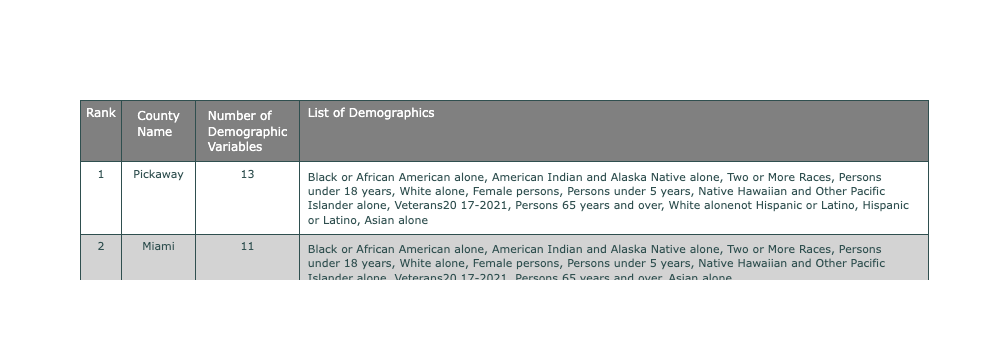

In [80]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'


fig = go.Figure(data=[go.Table(
    columnwidth = [40,70,100,600],

    header=dict(
        values=['Rank', 'County Name', 'Number of Demographic Variables', 'List of Demographics'],
                    line_color='darkslategray',
                    fill_color=headerColor,
                    align=['center','center', 'center', 'left'],
                    font=dict(color='white', size=12)
    ),
    cells=dict(
        values=[top_var_freqdfViz.Rank, top_var_freqdfViz.County, top_var_freqdfViz.Number_of_variables,
                top_var_freqdfViz.List_of_variables],
               line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['center', 'center', 'center', 'left'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()

### Tidying for plot

In [81]:
# # Make ranking table of vars.
ranked_vars_list = [(i+1, item[0], len(item[1]), item[1]) for i, item in enumerate(sorted_var_freq_dict.items())]
top_var_freqdf = pd.DataFrame(ranked_vars_list)
top_var_freqdf.columns=['Rank', 'County', 'Number_of_variables', 'List_of_variables']

In [82]:
# Separate the list of counties into individual rows
test2 = top_var_freqdf.explode('List_of_variables')

# Drop the duplicate columns
test2 = test2.drop_duplicates(subset=['Rank', 'List_of_variables'])

# Rename the columns for clarity
test5 = test2.rename(columns={
    'List_of_variables': 'Demographic_Variable',
    'Number_of_variables': 'Number_of_variables',
    'County': 'County'
})

# Display the updated data frame
# test5.head()

In [83]:
tidy_df2 = pd.merge(test5, melted_df[['County Name', 'Attribute', 'Value']], left_on=['County','Demographic_Variable'],
                   right_on=['County Name', 'Attribute'])

## Frequency of Each Population Demographic Variables and there values among the most common Counties found

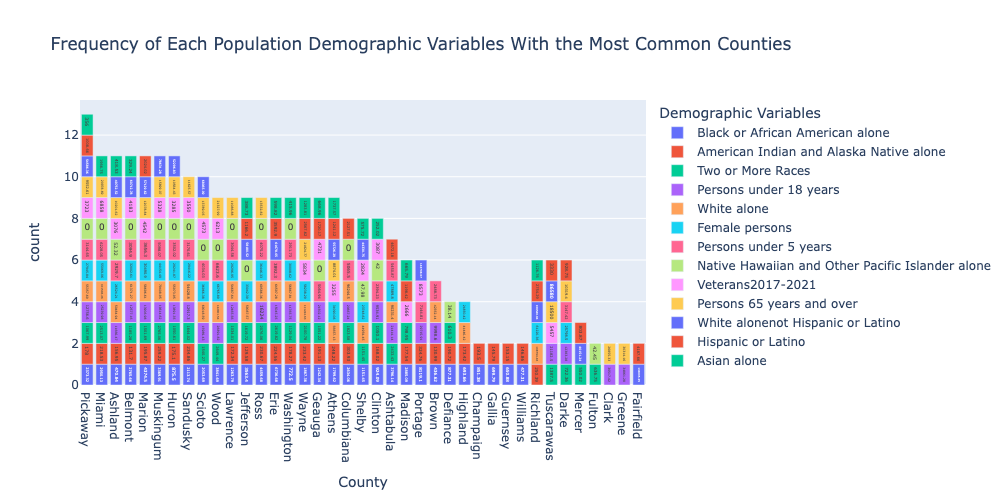

In [85]:
# create bar chart trace
fig = px.bar(tidy_df2, x=tidy_df2.County, color='Demographic_Variable',text='Value',
             labels={"Attribute": "Attribute",
                     "Value": "Attribute Value",
                     "Demographic_Variable":"Demographic Variables"
                 },
             title="Frequency of Each Population Demographic Variables With the Most Common Counties",)

fig.update_traces(textposition='inside')
# update the layout to adjust the size of the plot
fig.update_layout(
    width=1500,  # set the width of the plot to 800 pixels
    height=500,  # set the height of the plot to 600 pixels
)

# display the plot
fig.show()


## Most frequent Demographic variables

In [86]:
## Most common variables
res = sum(sorted_var_freq_dict.values(), [])
mostCommonVar = list(set(res))
mostCommonVar

['Hispanic or Latino',
 'Asian alone',
 'Female persons',
 'American Indian and Alaska Native alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'White alone',
 'Two or More Races',
 'Persons 65 years and over',
 'White alonenot Hispanic or Latino',
 'Veterans2017-2021',
 'Persons under 18 years',
 'Persons under 5 years',
 'Black or African American alone']

## Most Frequent Counties

In [87]:
mostCommonCounties = top_var_freqdfViz['County'].tolist()
print(mostCommonCounties)

['Pickaway', 'Miami', 'Ashland', 'Belmont', 'Marion', 'Muskingum', 'Huron', 'Sandusky', 'Scioto', 'Wood', 'Lawrence', 'Jefferson', 'Ross', 'Erie', 'Washington', 'Wayne', 'Geauga', 'Athens', 'Columbiana', 'Shelby', 'Clinton', 'Ashtabula', 'Madison', 'Portage', 'Richland', 'Tuscarawas', 'Darke', 'Brown', 'Defiance', 'Highland', 'Mercer', 'Champaign', 'Gallia', 'Guernsey', 'Williams', 'Fulton', 'Clark', 'Greene', 'Fairfield']


# Plotting the counties at risk on a map of Ohio

## Making Excel file with the most frequent Counties for Population Demographic Data

In [88]:
counties_ohio = [county + ' County, Ohio' for county in mostCommonCounties]

In [89]:
y = cluster2_df[cluster2_df['County Name'].isin(counties_ohio)]
mostFreqcountyVarTbl = y.iloc[:,:-3]
mostFreqcountyVarTbl['County'] = y.iloc[:, -1]
mostFreqcountyVarTbl.head()
mostFreqcountyVarTbl.to_excel('mostFreqPopData.xlsx')

In [90]:
# Creating new data frame with only the most common variable
mapPlotdf = cluster2_df[combinedVars]
mapPlotdf.head()

,Asian alone,Female persons,Persons 65 years and over,American Indian and Alaska Native alone,White alone,Native Hawaiian and Other Pacific Islander alone,Two or More Races,White alonenot Hispanic or Latino,Veterans2017-2021,Persons under 18 years,Persons under 5 years,Hispanic or Latino,Black or African American alone
0,82.63,13798.54,5095.27,165.25,26660.66,0.00,440.67,26385.24,1840,6665.16,1707.60,302.96,165.25
1,915.03,50021.64,18503.94,305.01,84081.09,0.00,3456.78,81132.66,6098,23587.44,6100.20,3761.79,12912.09
2,418.53,26524.21,10201.62,156.95,50484.94,52.32,784.74,49752.52,3076,11666.47,2929.70,837.06,470.84
3,486.68,47889.80,19467.40,389.35,90231.40,97.34,2433.43,86240.58,7158,21414.14,5450.87,4672.18,3796.14
4,1737.57,31090.06,8874.01,248.22,56657.13,62.06,1613.46,55726.29,3255,8998.12,2296.07,1241.12,1799.62


In [91]:

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv',
                   dtype={"fips": str})

# Filter the data frame to include only Ohio
df_ohio = df[df['STNAME'] == 'Ohio']

# Filter the counties GeoJSON file to include only Ohio counties
counties_ohio = {'type': 'FeatureCollection', 'features': []}
for feature in counties['features']:
    if feature['id'][:2] == '39':
        counties_ohio['features'].append(feature)

In [92]:
# Make new data frame with the most common vars
mapPlotdf['TempCounty Name'] = cluster2_df['County Name'].apply(lambda x: x[:-6])

In [93]:
# merge the two data frames based on the 'County Name' and 'CTYNAME' columns
merged_df = pd.merge(mapPlotdf, df_ohio[['CTYNAME', 'FIPS']], left_on='TempCounty Name', right_on='CTYNAME')

# drop the duplicate 'CTYNAME' column
merged_df.drop('CTYNAME', axis=1, inplace=True)
merged_df.drop('TempCounty Name', axis=1, inplace=True)
# print the merged data frame
merged_df.head()

,Asian alone,Female persons,Persons 65 years and over,American Indian and Alaska Native alone,White alone,Native Hawaiian and Other Pacific Islander alone,Two or More Races,White alonenot Hispanic or Latino,Veterans2017-2021,Persons under 18 years,Persons under 5 years,Hispanic or Latino,Black or African American alone,FIPS
0,82.63,13798.54,5095.27,165.25,26660.66,0.00,440.67,26385.24,1840,6665.16,1707.60,302.96,165.25,39001
1,915.03,50021.64,18503.94,305.01,84081.09,0.00,3456.78,81132.66,6098,23587.44,6100.20,3761.79,12912.09,39003
2,418.53,26524.21,10201.62,156.95,50484.94,52.32,784.74,49752.52,3076,11666.47,2929.70,837.06,470.84,39005
3,486.68,47889.80,19467.40,389.35,90231.40,97.34,2433.43,86240.58,7158,21414.14,5450.87,4672.18,3796.14,39007
4,1737.57,31090.06,8874.01,248.22,56657.13,62.06,1613.46,55726.29,3255,8998.12,2296.07,1241.12,1799.62,39009


In [94]:
merged_df['TempCounty Name'] = cluster2_df['County Name'].apply(lambda x: x[:-13])

In [95]:
# Example list of counties to check
counties_to_check = merged_df['TempCounty Name'].tolist()

# Create a list to hold safe counties
safe_counties = []

# Check each county and append to the safe_counties list if not in either of the two lists
for county in counties_to_check:
    if county not in mostCommonCounties and county not in bannedCountiesList:
        safe_counties.append(county)

In [96]:
merged_df['risk'] = merged_df['TempCounty Name'].apply(lambda x: 'At risk' if x in mostCommonCounties else
                                                      'Already has Banned' if x in bannedCountiesList else
                                                      'Safe' if x in safe_counties else merged_df[merged_df['TempCounty Name'] == x]['risk'].values[0])

In [97]:
merged_df.head()

,Asian alone,Female persons,Persons 65 years and over,American Indian and Alaska Native alone,White alone,Native Hawaiian and Other Pacific Islander alone,Two or More Races,White alonenot Hispanic or Latino,Veterans2017-2021,Persons under 18 years,Persons under 5 years,Hispanic or Latino,Black or African American alone,FIPS,TempCounty Name,risk
0,82.63,13798.54,5095.27,165.25,26660.66,0.00,440.67,26385.24,1840,6665.16,1707.60,302.96,165.25,39001,Adams,Safe
1,915.03,50021.64,18503.94,305.01,84081.09,0.00,3456.78,81132.66,6098,23587.44,6100.20,3761.79,12912.09,39003,Allen,Already has Banned
2,418.53,26524.21,10201.62,156.95,50484.94,52.32,784.74,49752.52,3076,11666.47,2929.70,837.06,470.84,39005,Ashland,At risk
3,486.68,47889.80,19467.40,389.35,90231.40,97.34,2433.43,86240.58,7158,21414.14,5450.87,4672.18,3796.14,39007,Ashtabula,At risk
4,1737.57,31090.06,8874.01,248.22,56657.13,62.06,1613.46,55726.29,3255,8998.12,2296.07,1241.12,1799.62,39009,Athens,At risk


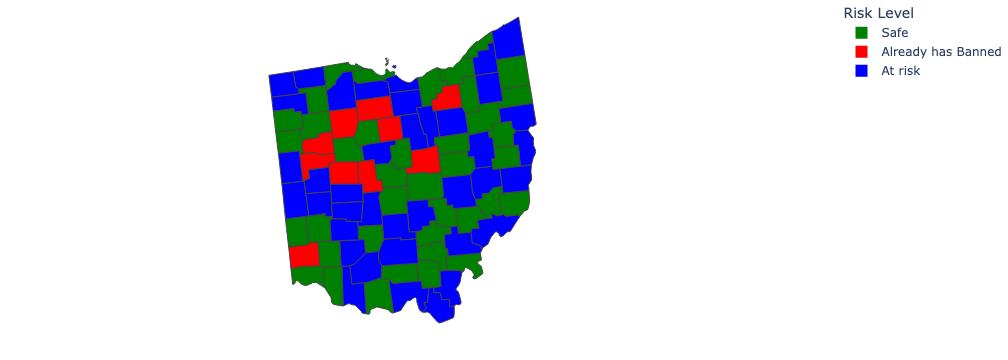

In [99]:
fig = px.choropleth(merged_df, geojson=counties_ohio, locations='FIPS', color='risk',
                    color_continuous_scale="Viridis",
                    range_color=(0, 2),
                    scope="usa",
                    hover_data=["TempCounty Name", 'Black or African American alone', 'Two or More Races', 'Persons under 18 years'],
                    labels={'risk':'Risk Level',
                           'TempCounty Name': 'County Name'},
                    color_discrete_map={'Already has Banned': 'red',
                                        'At risk': 'blue', 'Safe': 'green'})
                          
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()